# **5CS037 - Concepts and Technologies of AI.**
# Implementation of k-Nearest Neighbor from Scratch.

In [1]:
# Mouting drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time

# Problem - 1: Perform a classification task with knn from scratch.


# **1. Load the Dataset:**
 * Read the dataset into a pandas DataFrame.
 * Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).

In [3]:
# accessing dataset from the drive
dataset = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W4_dataset/diabetes.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print("First 10 rows of the dataset.\n")
dataset.head(10)

First 10 rows of the dataset.



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print("Data types of each columns in dataset.\n")
dataset.dtypes

Data types of each columns in dataset.



,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
print("Summary Statistics of each column in dataset.\n")
dataset.describe()

Summary Statistics of each column in dataset.



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **2. Handle Missing Data:**  
 * Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [7]:
print("Null in each column of dataset.\n")
null_count = dataset.isnull().sum()
print(null_count)

Null in each column of dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There aren't any missing values, in the dataset.

# **3. Feature Engineering:**
 * Separate the feature matrix (X) and target variable (y).

In [8]:
# Separating feature matrix and label vectors
feature_matrix = dataset.drop('Outcome', axis=1)
label_vector = dataset['Outcome']

In [9]:
print("Feature Matrix:\n")
feature_matrix.head(10)

Feature Matrix:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [10]:
print("\nTarget Vector:\n")
label_vector.head(10)


Target Vector:



,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [11]:
# Converting the feature matrix and label vectors into numpy array
input_matrix = feature_matrix.to_numpy()
output_array = label_vector.to_numpy()

 * Perform a train - test split from scratch using a 70% − 30% ratio.

In [12]:
# Function to split input matrix and output array into ratio of 7:3
def split_data_train_test(input_matrix, output_array, test_proportion=0.3, random_seed = 42):
  """
  Splits dataset into 4 parts input_matrix_train, input_matrix_test, output_array_train, output_array_test

  Parameters:
  input_matrix (np.ndarray): Feature matrix
  output_array (np.ndarray): Label vector
  test_proportion (float): proportion of dataset to include test split (0 < test_proportion < 1)
  random_seed (int) : seed for reproducibility

  Returns:
  input_matrix_train (np.ndarray): Training feature matrix
  input_matrix_test (np.ndarray): Testing feature matrix
  output_array_train (np.ndarray): Training label vector
  output_array_test (np.ndarray): Testing label vector
  """
  # Setting a random seed for reproducibility
  np.random.seed(random_seed)

  # Listing out all of the indices of feature matrix
  indices = np.arange(input_matrix.shape[0])

  # Shuffling indices to be randomly oriented
  np.random.shuffle(indices)

  # Calculating size of test according to proportion
  test_split_size = int(len(input_matrix) * test_proportion)

  # Separatring indices of test and indices of train
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  # Storing train and test data according to indices (Perform the train-test split)
  input_matrix_train = input_matrix[train_indices]
  input_matrix_test = input_matrix[test_indices]
  output_array_train = output_array[train_indices]
  output_array_test = output_array[test_indices]

  return input_matrix_train, input_matrix_test, output_array_train, output_array_test


In [13]:
# Storing the divided train-test split data
X_train, X_test, Y_train, Y_test = split_data_train_test(input_matrix, output_array, test_proportion=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of Y_train: (538,)
Shape of Y_test: (230,)


# **4. Implement KNN:**
* Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
* Compute distances using Euclidean distance.


In [14]:
# Function to calculate euclidean distance
def calculate_euclidean_distance(point1, point2):
  """
  Calculate the Euclidean distance between two points in n-dimensional space

  Parameters:
  point1 (np.ndarray): First point
  point2 (np.ndarray): Second point

  Returns:
  distance (float): Euclidean distance between point1 and point2

  Raises:
  ValueError: If the input points have different shapes (incompatible dimensions)
  """
  # Check if the dimensions of both points are same
  if point1.shape != point2.shape:
    raise ValueError("Points must have same dimensions to calculate Euclidean distance.")

  # Calculate the Eclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))

  return distance

In [15]:
# Test case for calculate_euclidean_distance function
try:
  point1 = np.array([12,5])
  point2 = np.array([0,0])

  distance = calculate_euclidean_distance(point1, point2)
  expected_distance = 13.0

  assert np.isclose(distance, expected_distance), f"Expected {expected_distance}, but got {distance}"
  print("Test passed!")
except ValueError as ve:
  print(f"ValueError : {ve}")
except AssertionError as ae:
  print(f"AssertionError : {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed!


* Write functions for:
   * Predicting the class for a single query.

In [16]:
# Function for KNN prediction for a single query
def knn_predict_single(query, input_matrix_train, output_array_train, k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.

  Parameters:
  query (np.ndarray): The input query for which the prediction is to be made.
  input_matrix_train (np.ndarray): The training feature matrix.
  output_array_train (np.ndarray): The corresponding target labels for the training
  k (int): The number of nearest neighbors to consider for the prediction

  Returns:
  prediction (int): The predicted class label for the query.
  """

  distances = [calculate_euclidean_distance(query, x) for x in input_matrix_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = output_array_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()

  return prediction

* Write functions for:
   * Predicting classes for all test samples.

In [17]:
# Function to test KNN for all test samples
def knn_predict_all(input_matrix_train, output_array_train, input_matrix_test, k=3):
  """
  Predict the class labels for all test samples using the k-nearest neighbors algorithm.

  Parameters:
  input_matrix_train (np.ndarray): The training feature matrix.
  output_array_train (np.ndarray): The corresponding target labels for the training
  input_matrix_test (np.ndarray): The test feature matrix.
  k (int): The number of nearest neighbors to consider for the prediction

  Returns:
  predictions (np.ndarray): The predicted class labels for the test samples.
  """

  # Prediction list for every point in input_matrix_test (Test Case)
  predictions = [knn_predict_single(x, input_matrix_train, output_array_train, k) for x in input_matrix_test]

  # Convert the list to np array
  prediction_list = np.array(predictions)

  return prediction_list

In [18]:
# Sample test case for knn
try :
  input_test_sample = X_test[:15]
  output_test_sample = Y_test[:15]

  # Make predictions
  predictions = knn_predict_all(X_train, Y_train, input_test_sample, k=3)

  print("Predictions : ", predictions)
  print("Actual labels : ", output_test_sample)

  assert predictions.shape == output_test_sample.shape, "The shape of the prediction does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions :  [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0]
Actual labels :  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
Test case passed successfully!


* Evaluate the performance using accuracy.

In [19]:
# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
  """
  Compute the accuracy of the predictions.

  Parameters:
  y_true (np.ndarray): The true labels.
  y_pred (np.ndarray): The predicted labels.

  Returns:
  accuracy (float): The accuracy of the predictions.
  """

  correct_predictions = np.sum(y_true == y_pred)
  total_prediction = len(y_pred)
  accuracy = correct_predictions / total_prediction * 100

  return accuracy

In [20]:
# Perform predictions on entire set
org_acc = 0
try:
  # Make the predictions on entire set
  predictions = knn_predict_all(X_train, Y_train, X_test, k=3)

  # Compute the accuracy
  org_acc = accuracy = compute_accuracy(Y_test, predictions)
  print(f"Accuracy of the KNN model on dataset : {accuracy:.2f}")

except Exception as e:
  print(f"An unexpected error occurred: {e}")

Accuracy of the KNN model on dataset : 67.39


# **Problem - 2 - Experimentation:**

# **1. Repeat the Classification Task:**


* Scale the Feature matrix X.

In [21]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
scaled_X_train = (X_train - X_mean) / X_std
scaled_X_test = (X_test - X_mean) / X_std

* Use the scaled data for training and testing the kNN Classifier.
* Record the results.

In [22]:
# Perform prediction on scaled input matrix
scaled_acc = 0
try:
  # Make prediction of scaled dataset
  scaled_predictions = knn_predict_all(scaled_X_train, Y_train, scaled_X_test, k=3)

  # Compute the accuracy
  scaled_acc = scaled_accuracy = compute_accuracy(Y_test, scaled_predictions)
  print(f"Accuracy of the KNN model on scaled dataset : {scaled_accuracy:.2f}")

except Exception as e:
  print(f"An unexpected error occurred: {e}")

Accuracy of the KNN model on scaled dataset : 70.87


# **2. Comparative Analysis:**
Compare the Results -
* Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
* Discuss:
  * How scaling impacted the KNN performance.
  * The reason for any observed changes in accuracy.

In [23]:
abs_diff = abs(org_acc - scaled_acc)
if org_acc > scaled_acc:
  print(f"Scaling the feature matrix is bad idea. Performance was reduced by {abs_diff:.2f}%.")
else:
  print(f"Scaling the feature matrix is good idea. Performance was increased by {abs_diff:.2f}%.")

Scaling the feature matrix is good idea. Performance was increased by 3.48%.


Scaling increased the accuracy of KNN by 3.48%.

The accuracy was increased because, every feature now has equal contribution acheiving balanced and accurate representatios of distances.

# **Problem - 3 - Experimentation with k:**

# **1. Vary the number of neighbors - k:**
* Run the KNN model on both the original and scaled datasets for a range of:

                  k= 1, 2, 3, . . . 15

* For each k, record:
  * Accuracy.
  * Time taken to make predictions.

In [41]:
results = {
    "k": [],
    "dataset": [],  # 'original' or 'scaled'
    "accuracy": [],
    "time": []
}

datasets = {
    "original": (X_train, X_test),
    "scaled": (scaled_X_train, scaled_X_test)
}

for k in np.arange(1, 16):
    for dataset_name, (train_data, test_data) in datasets.items():
        # Measure time
        start_time = time.perf_counter()
        predictions = knn_predict_all(train_data, Y_train, test_data, k=k)
        elapsed_time = time.perf_counter() - start_time

        # Compute accuracy
        accuracy = compute_accuracy(Y_test, predictions)

        # Store results
        results["k"].append(k)
        results["dataset"].append(dataset_name)
        results["accuracy"].append(accuracy)
        results["time"].append(elapsed_time)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print or analyze the results
results_df.head(5)


,k,dataset,accuracy,time
0,1,original,68.695652,1.047306
1,1,scaled,63.478261,0.915290
2,2,original,72.608696,0.873166
3,2,scaled,66.086957,0.903090
4,3,original,67.391304,0.956197


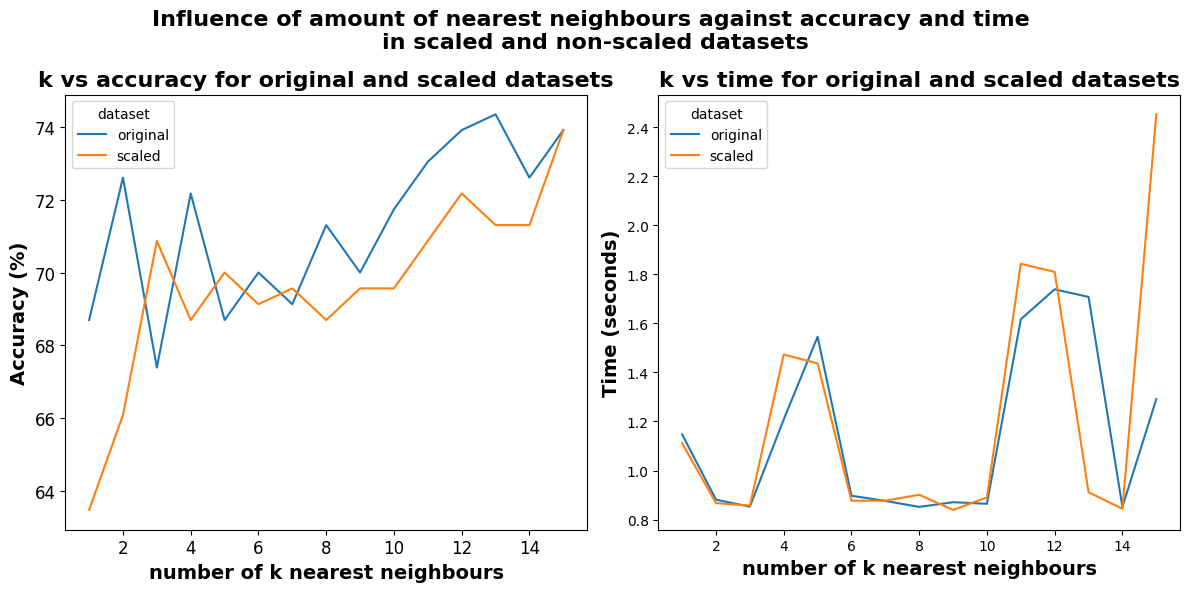

In [40]:
# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.lineplot(data=results_df, x='k', y='accuracy', hue='dataset', ax=axes[0])

axes[0].set_title("k vs accuracy for original and scaled datasets", fontsize=16, fontweight='bold')
axes[0].set_xlabel("number of k nearest neighbours", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy (%)", fontsize=14, fontweight='bold')
axes[0].tick_params(labelsize=12)


sns.lineplot(data=results_df, x='k', y='time', hue='dataset', ax=axes[1])
axes[1].set_title("k vs time for original and scaled datasets", fontsize=16, fontweight='bold')
axes[1].set_xlabel("number of k nearest neighbours", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Time (seconds)", fontsize=14, fontweight='bold')
axes[0].tick_params(labelsize=12)

plt.suptitle("Influence of amount of nearest neighbours against accuracy and time \nin scaled and non-scaled datasets", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **3. Analyze and Discuss:**
* Discuss how the choice of k affects the accuracy and computational cost.
* Identify the optimal k based on your analysis.

**Effect of k on Accuracy**  
In the left graph, accuracy fluctuates as k (the number of nearest neighbors) increases for both datasets. For the original dataset, accuracy improves with increasing k, though irregular spikes and dips are observed. Larger k values (e.g., 12–14) provide smoother, more consistent accuracy. In the scaled dataset, accuracy starts lower but increases steadily, becoming comparable to the original dataset for larger k. Scaling reduces variability, especially for smaller k values.

**Effect of k on Computational Cost**  
The right graph shows that computational cost, measured as time, varies with k. For both datasets, smaller k values result in lower computation times, while larger k values increase time requirements. Notably, the scaled dataset sometimes has higher computational costs than the original dataset for certain k values (e.g. k=14)

**Optimal k**  
Choosing an optimal k balances accuracy and computational cost. For both datasets, k values between 8 and 12 appear to provide a good trade-off, achieving high accuracy while avoiding the excessive computational cost associated with larger k.